In [2]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.5 MB/s eta 0:00:00a 0:00:010m

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


/tmp/ipykernel_84/246021455.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


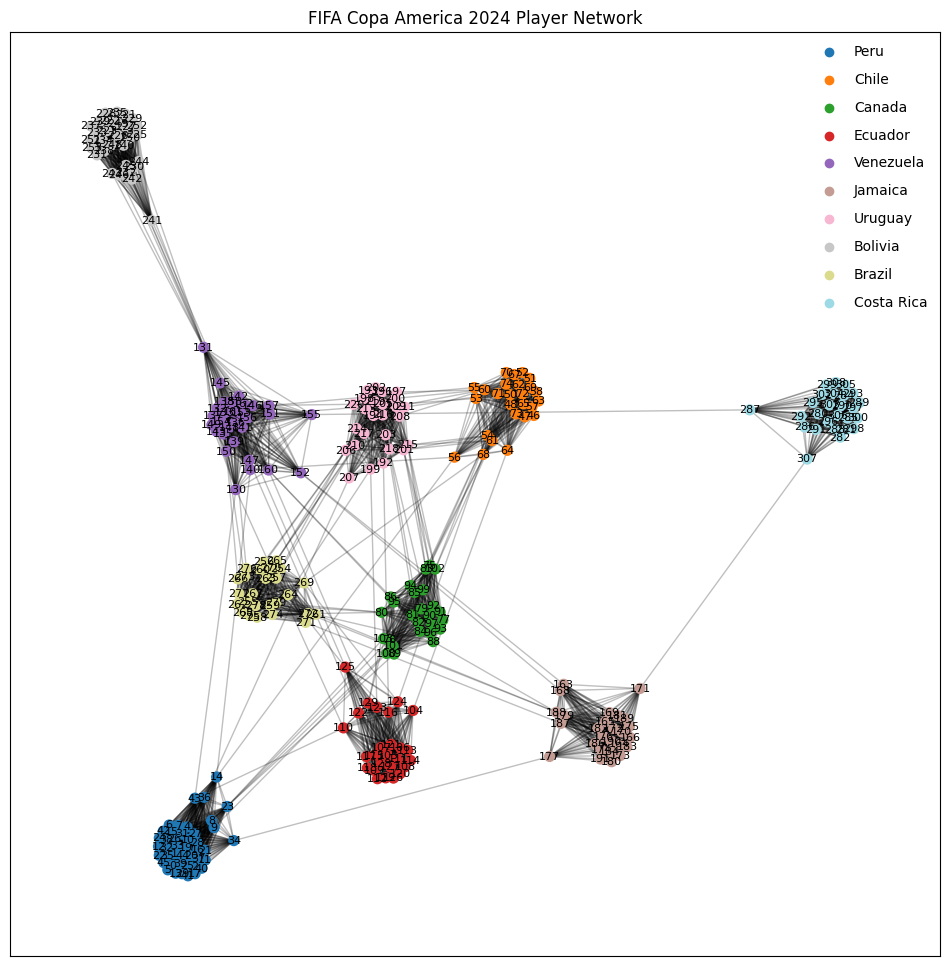

            centrality
Country               
Peru          0.152480
Canada        0.001742
Venezuela     0.000822
Chile         0.000379
Uruguay       0.000376
Ecuador       0.000365
Jamaica       0.000350
Brazil        0.000021
Bolivia       0.000019
Costa Rica    0.000002


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Get the webpage content
url = "https://en.wikipedia.org/wiki/2024_Copa_América_squads"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Parse the tables
tables = pd.read_html(str(soup))

# List of teams
teams = ["Peru", "Chile", "Canada", "Ecuador",
         "Venezuela", "Jamaica", "Uruguay", "Bolivia",
         "Brazil", "Costa Rica"]

# Create the dataframe
df = pd.DataFrame()

for i in range(len(teams)):
    table = tables[i]
    table['Country'] = teams[i]
    df = pd.concat([df, table[['Player', 'Country', 'Club']]])
   

df.reset_index(drop=True, inplace=True)
df['id'] = df.index.astype(str)

df = df.dropna()

# Create the network dataframe
edges = []

for _, row in df.iterrows():
    country_teammates = df[(df['Country'] == row['Country']) & (df['id'] != row['id'])]
    club_teammates = df[(df['Club'] == row['Club']) & (df['id'] != row['id'])]
    
    for _, teammate in country_teammates.iterrows():
        edges.append((row['id'], teammate['id']))
    for _, teammate in club_teammates.iterrows():
        edges.append((row['id'], teammate['id']))

edges = list(set(edges))

# Create the graph
G = nx.Graph()
G.add_edges_from(edges)

# Add attributes to the nodes
attrs = df.set_index('id').to_dict('index')
nx.set_node_attributes(G, attrs)

# Assign a unique color to each country
countries = df['Country'].unique()
cmap = plt.get_cmap('tab20', len(countries))
color_mapping = {country: cmap(i) for i, country in enumerate(countries)}

# Plot the graph
pos = nx.spring_layout(G, k=0.15)
plt.figure(figsize=(12, 12))

nx.draw_networkx_edges(G, pos, alpha=0.25)
nodes = nx.draw_networkx_nodes(
    G, pos,
    node_color=[color_mapping[data['Country']] for _, data in G.nodes(data=True)],
    node_size=50
)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Create a legend
for country, color in color_mapping.items():
    plt.scatter([], [], c=[color], label=country)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='best')

plt.title("FIFA Copa America 2024 Player Network")
plt.show()

# Calculate eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(G)

# Create a DataFrame to rank the countries by eigenvector centrality
centrality_df = pd.DataFrame.from_dict(eigen_centrality, orient='index', columns=['centrality'])
centrality_df['Country'] = centrality_df.index.map(lambda x: attrs[x]['Country'])
country_centrality = centrality_df.groupby('Country').mean().sort_values(by='centrality', ascending=False)

# Display the ranked eigenvector centrality scores
print(country_centrality)

/tmp/ipykernel_84/3542248027.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


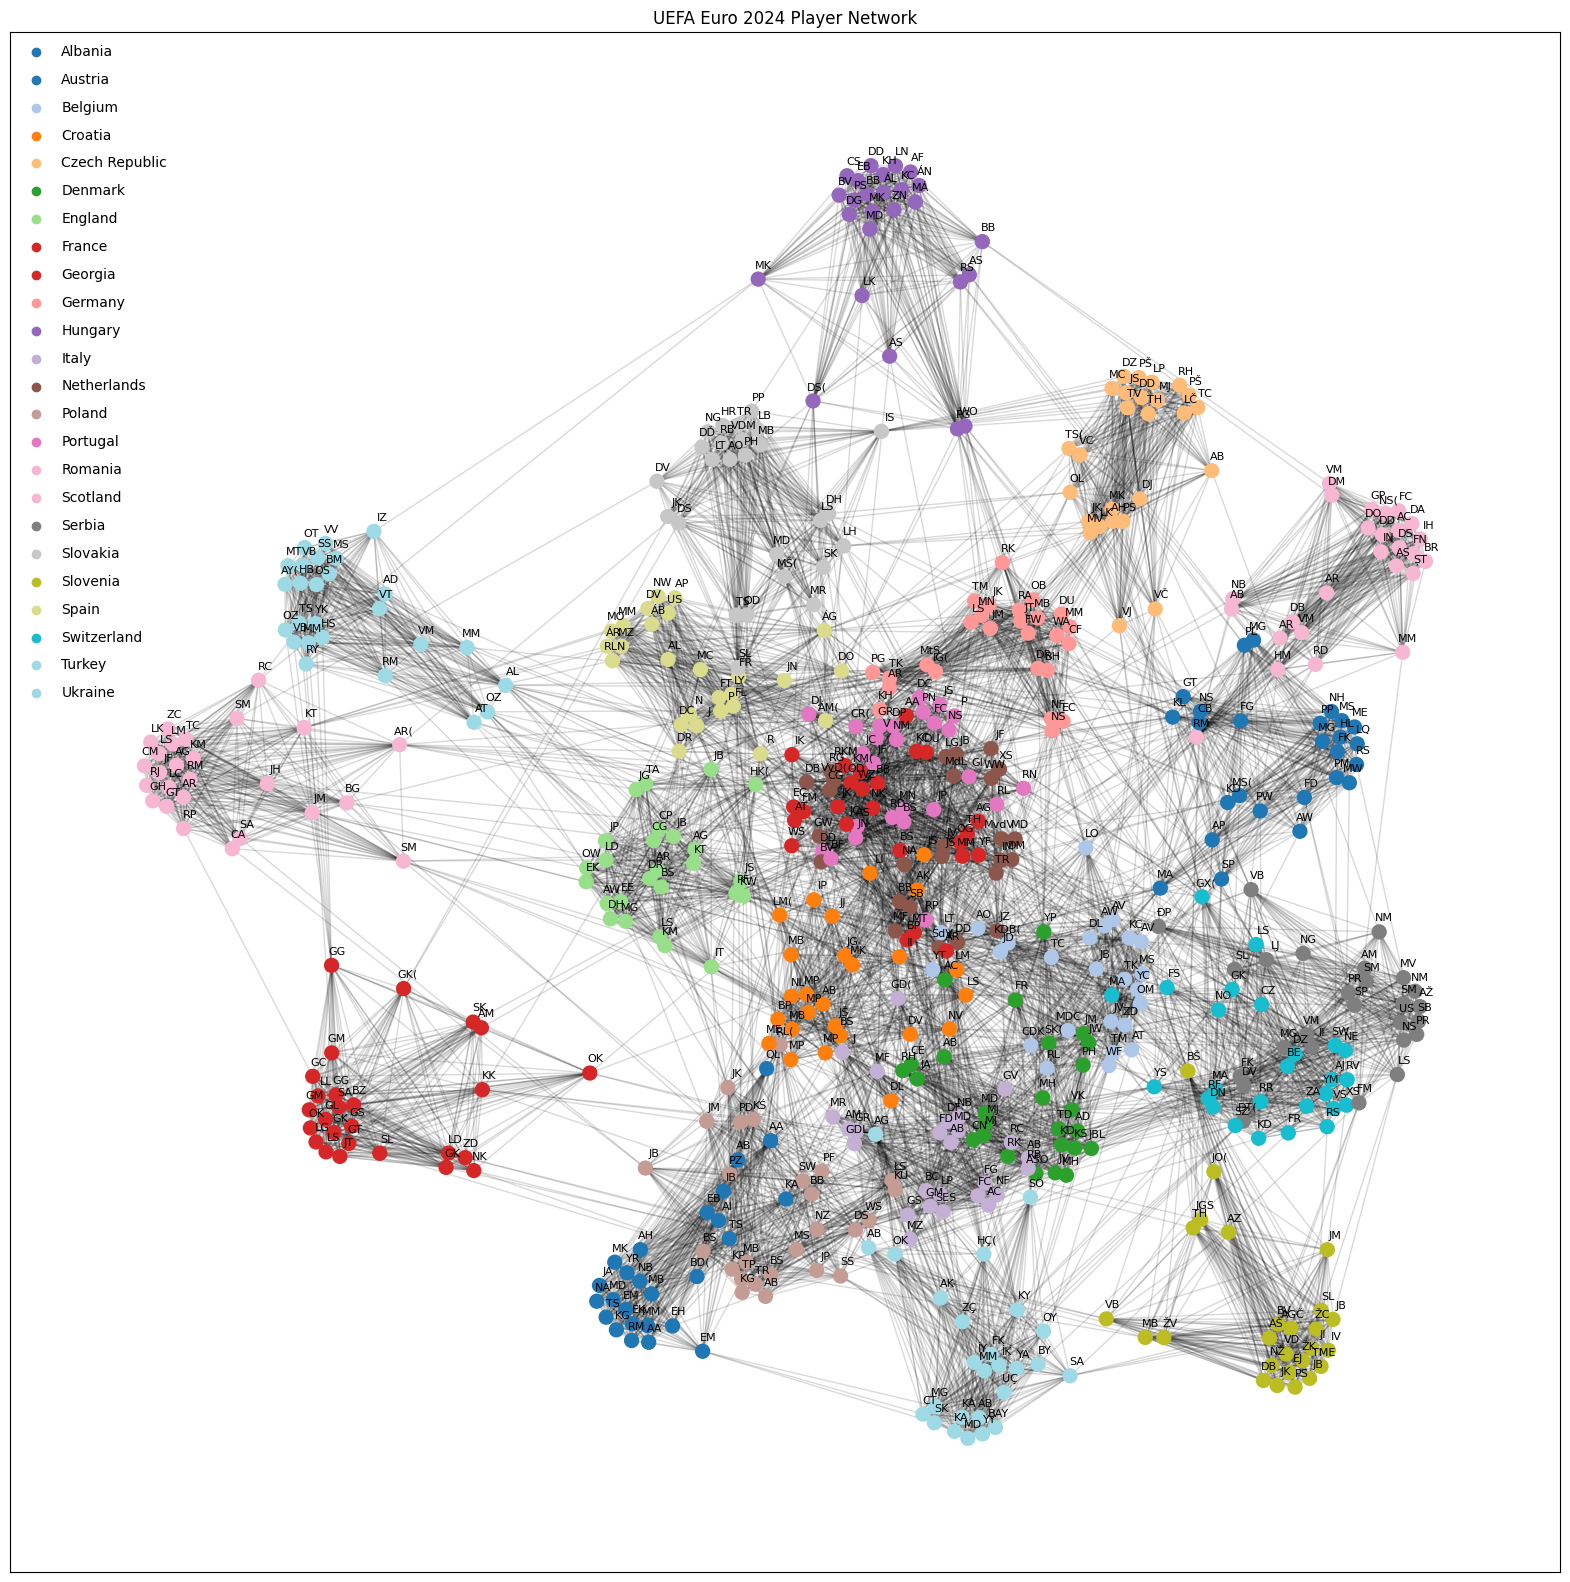

                mean_centrality
Country                        
France                 0.067755
Germany                0.064623
Netherlands            0.061825
Portugal               0.061293
Spain                  0.059636
England                0.056774
Italy                  0.055208
Denmark                0.041107
Switzerland            0.040282
Croatia                0.038232
Belgium                0.035020
Austria                0.034334
Turkey                 0.034088
Poland                 0.031597
Czech Republic         0.022272
Serbia                 0.021805
Slovakia               0.018107
Ukraine                0.016299
Albania                0.015509
Hungary                0.013937
Scotland               0.013009
Slovenia               0.009643
Romania                0.005027
Georgia                0.004198


In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Get the webpage content
url = "https://en.wikipedia.org/wiki/UEFA_Euro_2024_squads"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Parse the tables
tables = pd.read_html(str(soup))

# List of teams
teams = ["Germany", "Scotland", "Hungary", "Switzerland", "Spain", "Croatia", "Italy", "Albania", "Slovenia", "Denmark", "Serbia", "England", "Poland", "Netherlands",
         "Austria", "France", "Belgium", "Slovakia", "Romania", "Ukraine", "Turkey", "Georgia", "Portugal", "Czech Republic"]

# Create the dataframe
df = pd.DataFrame()

for i in range(len(teams)):
    table = tables[i]
    table['Country'] = teams[i]
    df = pd.concat([df, table[['Player', 'Country', 'Club']]])
   

df.reset_index(drop=True, inplace=True)
df['id'] = df.index.astype(str)

# Filter the DataFrame to include rows where all columns are not null
df = df.dropna()

# Create the network dataframe
edges = []

for _, row in df.iterrows():
    country_teammates = df[(df['Country'] == row['Country']) & (df['id'] != row['id'])]
    club_teammates = df[(df['Club'] == row['Club']) & (df['id'] != row['id'])]
    
    for _, teammate in country_teammates.iterrows():
        edges.append((row['id'], teammate['id']))
    for _, teammate in club_teammates.iterrows():
        edges.append((row['id'], teammate['id']))

edges = list(set(edges))

# Create the graph
G = nx.Graph()
G.add_edges_from(edges)

# Add attributes to the nodes
attrs = df.set_index('id').to_dict('index')
nx.set_node_attributes(G, attrs)

# Assign a unique color to each country
countries = df['Country'].unique()
cmap = plt.get_cmap('tab20', len(countries))
color_mapping = {country: cmap(i) for i, country in enumerate(sorted(countries))}

# Function to get player initials
def get_initials(player_name):
    return ''.join([name[0] for name in player_name.split()])

# Plot the graph
pos = nx.spring_layout(G, k=0.15)
plt.figure(figsize=(20, 20))

nx.draw_networkx_edges(G, pos, alpha=0.15)
nodes = nx.draw_networkx_nodes(
    G, pos,
    node_color=[color_mapping[data['Country']] for _, data in G.nodes(data=True)],
    node_size=100,  # Increase node size for better visibility
)

# Draw labels outside the nodes with player initials
ax = plt.gca()
for node, (x, y) in pos.items():
    player_initials = get_initials(attrs[node]['Player'])
    ax.annotate(player_initials, xy=(x, y), xytext=(10, 10),
                textcoords='offset points', ha='right', va='center', fontsize=8)

# Create a legend
for country, color in color_mapping.items():
    plt.scatter([], [], c=[color], label=country)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='best')

plt.title("UEFA Euro 2024 Player Network")

plt.savefig('uefa_euro_2024_player_network.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(G)

# Create a DataFrame to rank the countries by eigenvector centrality
centrality_df = pd.DataFrame.from_dict(eigen_centrality, orient='index', columns=['mean_centrality'])
centrality_df['Country'] = centrality_df.index.map(lambda x: attrs[x]['Country'])
country_centrality = centrality_df.groupby('Country').mean().sort_values(by='mean_centrality', ascending=False)

# Display the ranked eigenvector centrality scores
print(country_centrality)